In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

stops = pd.read_csv('https://static.data.gov.hk/td/pt-headway-tc/stops.txt')
routes = pd.read_csv('https://static.data.gov.hk/td/pt-headway-tc/routes.txt')
trips = pd.read_csv('https://static.data.gov.hk/td/pt-headway-tc/trips.txt')
stop_times = pd.read_csv('https://static.data.gov.hk/td/pt-headway-tc/stop_times.txt')

In [2]:
# your code to add route 5005 here
S1 = (22.31525,114.21969)
S2 = (22.39156,113.97605)
S1_stop = stops[(((stops.stop_lon-S1[1])**2+(stops.stop_lat-S1[0])**2)**0.5)==min((((stops.stop_lon-S1[1])**2+(stops.stop_lat-S1[0])**2)**0.5))]
S2_stop = stops[(((stops.stop_lon-S2[1])**2+(stops.stop_lat-S2[0])**2)**0.5)==min((((stops.stop_lon-S2[1])**2+(stops.stop_lat-S2[0])**2)**0.5))]
r5005 = pd.DataFrame([[5005,'custom',5005,'寶達巴士總站 - 屯門站總站',3,'']],columns=routes.columns)
routes = routes.append(r5005,ignore_index=True)
t5005 = pd.DataFrame([[5005,123,'5005-1-123-0600']],columns=trips.columns)
trips = trips.append(t5005,ignore_index=True)
st5005 = pd.DataFrame([['5005-1-123-0600','06:00:00','06:00:00',8250,1,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,7068,2,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,7074,3,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,4062,4,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,S1_stop.stop_id.values[0],5,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,S2_stop.stop_id.values[0],6,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,9785,7,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,2866,8,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,1212,9,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,1214,10,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,9763,11,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,9793,12,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,9803,13,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,2945,14,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,12388,15,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,2915,16,0,0,0],
                       ['5005-1-123-0600',np.nan,np.nan,9816,17,0,0,0],
                       ['5005-1-123-0600','07:40:00','07:40:00',12400,18,0,0,0]],
                      columns=stop_times.columns)
stop_times = stop_times.append(st5005,ignore_index=True)
#[8250,7068,7074,4062,a,b,9785,2866,1212,1214,9763,9793,9803,2945,12388,2915,9816,12400]
display(routes[routes.route_short_name==5005])
trip5005 = stop_times[stop_times.trip_id.str.contains('5005')][['stop_id','stop_sequence']].merge(stops)
print('https://google.com/maps/dir/'+'/'.join(round(trip5005.stop_lat,8).astype(str)+'%09'+round(trip5005.stop_lon,9).astype(str)))
trip5005

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url
2100,5005,custom,5005,寶達巴士總站 - 屯門站總站,3,


https://google.com/maps/dir/22.31768%09114.23604/22.31824%09114.23188/22.32211%09114.22598/22.31694%09114.22666/22.31525%09114.21969/22.39156%09113.97605/22.38766%09113.97534/22.37665%09113.96646/22.37555%09113.96085/22.38553%09113.96525/22.39673%09113.9674/22.40516%09113.96895/22.41051%09113.97847/22.39635%09113.97755/22.39491%09113.9739


,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,zone_id,location_type,stop_timezone
0,8250,1,[KMB+NWFB] 寶達巴士總站/寶達邨|[KMB] 寶達巴士總站,22.31768,114.23604,8250,0,Asia/Hong_Kong
1,7068,2,[KMB] 秀逸樓,22.31824,114.23188,7068,0,Asia/Hong_Kong
2,7074,3,[KMB] 聯合醫院,22.32211,114.22598,7074,0,Asia/Hong_Kong
3,4062,4,"[KMB+NWFB] 和樂邨/和樂邨, 協和街|[KMB] 和樂邨",22.31694,114.22666,4062,0,Asia/Hong_Kong
4,8219,5,[KMB] 觀塘（雅麗道）總站|[KMB] 牛頭角站,22.31525,114.21969,8219,0,Asia/Hong_Kong
5,9784,6,[KMB] 屯門市中心總站|[LWB] 屯門市中心,22.39156,113.97605,9784,0,Asia/Hong_Kong
6,9785,7,[KMB] 安定邨|[LRTFeeder] 安定邨|[LWB] 安定邨,22.38766,113.97534,9785,0,Asia/Hong_Kong
7,1212,9,"[CTB] 湖景邨湖翠樓, 湖景路|[KMB] 湖景邨湖翠樓|[LRTFeeder] 湖景邨...",22.37665,113.96646,1212,0,Asia/Hong_Kong
8,1214,10,"[CTB] 美樂花園, 湖翠路|[KMB] 美樂花園|[LRTFeeder] 美樂花園",22.37555,113.96085,1214,0,Asia/Hong_Kong
9,9763,11,"[CTB] 龍門居, 龍門路|[KMB] 龍門站|[LRTFeeder] 輕鐵龍門站|[LW...",22.38553,113.96525,9763,0,Asia/Hong_Kong



258D (5) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=258D&lang=zh-hk
https://google.com/maps/dir/22.34233%09114.18851/22.34257%09114.17289/22.34159%09114.16675/22.35753%09114.01969/22.35845%09114.01883/22.39365%09113.96753

259D (5) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=259D&lang=zh-hk
https://google.com/maps/dir/22.34233%09114.18851/22.34257%09114.17289/22.34159%09114.16675/22.35753%09114.01969/22.35845%09114.01883/22.38172%09113.97039

260X (11) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=260X&lang=zh-hk
https://google.com/maps/dir/22.2963%09114.177/22.29471%09114.17423/22.29597%09114.17216/22.29878%09114.17197/22.30175%09114.17176/22.3038%09114.17163/22.30968%09114.17109/22.30553%09114.16852/22.30631%09114.16448/22.35753%09114.01969/22.35845%09114.01883/22.39281%09113.97696

61X (5) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=61X&lang=zh-hk
https://google.com/maps/dir/22.34233%09114.18851/22.34257%09114.17289/22.3415

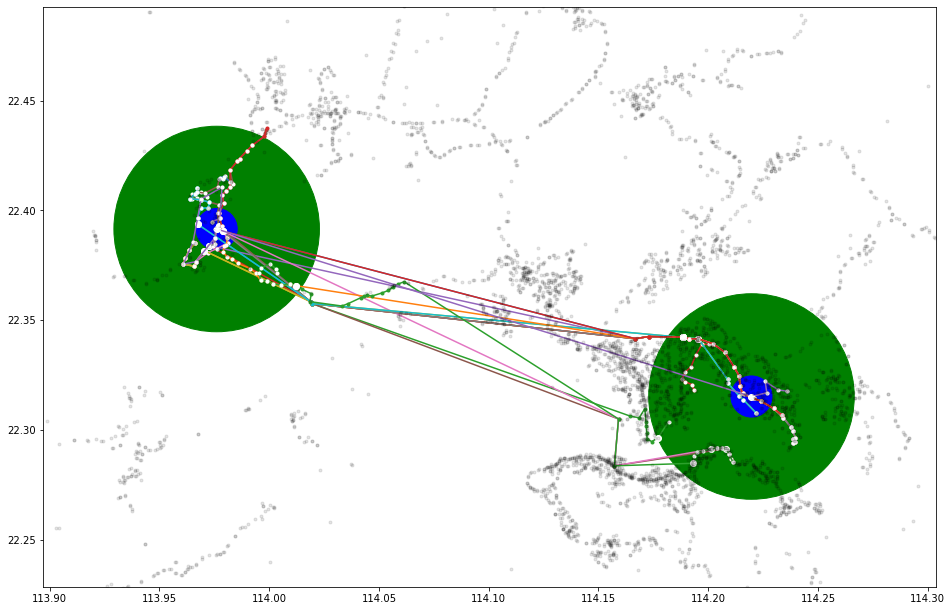

In [6]:
pyplot.figure(figsize=(16,16*4/6))
pyplot.axis('equal')

# define radius from Origin and Destination
on = 5 / 106.8
off = 5 / 106.8
O = [(_[1],_[0]) for _ in [(22.31525,114.21969)]][0] # Set Origin coordinates
#O = [(_[1],_[0]) for _ in [(22.30688110834343, 114.23553536060928)]][0] # Set Test Origin coordinates
D = [(_[1],_[0]) for _ in [(22.39156,113.97605)]][0] # Set Destination coordinates
# check if stops are within the defined radius from Origin 
stop   = (((stops.stop_lon-O[0])**2+(stops.stop_lat-O[1])**2)**0.5 < on)
# select all records in stop_times with stop that are within the defined radius from Origin
select = stop_times.stop_id.isin(stops.stop_id[stop])
# select all trip_ids of routes that have at least one stop within the defined radius from Origin
# and at least one stop within the definded radius from Destination
Select = stop_times.trip_id[select].isin(stop_times.trip_id[stop_times.stop_id.isin(stops.stop_id[
         ((stops.stop_lon-D[0])**2+(stops.stop_lat-D[1])**2)**0.5 < off])])

route_id = [] 

for trip_id in stop_times.trip_id[select][Select].unique():
    if trip_id[0:6] not in route_id:
        route_id += [trip_id[0:6]]
        trip = stop_times[stop_times.trip_id == trip_id][['stop_id','stop_sequence']].merge(stops) # generate a detail list of stops of the route
        d = ((trip.stop_lon-D[0])**2+(trip.stop_lat-D[1])**2)**0.5 < off # check if stops of the route within the defined radius from Destination
        o = ((trip.stop_lon-O[0])**2+(trip.stop_lat-O[1])**2)**0.5 < on # check if stops of the route within the defined radius from Origin
        dmin = min(d[d].index) # the first stop of the route within the defined radius from the Destination
        omax = max(o[o].index) # the last stop of the route within the defined radius from the Origin
        if (max(d[d].index)>=omax):
            # Plot the routes and the related stops, with special indication "wo" on the stops of routes that are either
            # first stop within the defined radius from Destination or last stop within the defined radius of Origin
            pyplot.plot(trip.stop_lon,trip.stop_lat,'.-')
            pyplot.plot(trip.stop_lon[o|d],trip.stop_lat[o|d],'w.',trip.stop_lon[[omax,dmin]],trip.stop_lat[[omax,dmin]],'wo')
            # print the route_url from the routes DataFrame
            print(f'\n{routes.route_short_name[routes.route_id == int(trip_id[0:4])].values[0]} ({dmin-omax if max(d) else ""})',
                  routes.route_url[routes.route_id == int(trip_id[0:4])].values[0])
            # print also the routes in Google Map 
            print('https://google.com/maps/dir/'+'/'.join(round(trip.stop_lat[omax:dmin+1],8).astype(str)+'%09'+round(trip.stop_lon[omax:dmin+1],9).astype(str)))


stop = stops.stop_id.isin(stop_times.stop_id[stop_times.trip_id.str[0:6].isin(route_id)])
xlim = pyplot.gca().get_xlim()
pyplot.autoscale(False)
pyplot.plot(stops.stop_lon[-stop],stops.stop_lat[-stop],'.k',alpha=.1) # plot all stops in black with 10% transparency
pyplot.gcf().gca().add_artist(pyplot.Circle(O,on,color='g')) # plot a green circle of defined radius from Origin
pyplot.gcf().gca().add_artist(pyplot.Circle(D,off,color='g')) # plot a green circle of defined radius from Destination
pyplot.gcf().gca().add_artist(pyplot.Circle(O,1/106.8,color='b')) # plot a blue circle of radius=1km from Origin
pyplot.gcf().gca().add_artist(pyplot.Circle(D,1/106.8,color='b')) # plot a blue circle of radius=1km from Destination
pyplot.plot(O[0],O[1],'w*',D[0],D[1],'w*'); # Indicate the Origin and Destination with two white stars
pyplot.xlim(xlim[0]-0.05,xlim[1]+0.05);
# pyplot.show()
# display(stops[stop])